Requirements:
pandas, numpy, xgboost, sklearn.model_selection, sklearn.metrics, matplotlib, matplotlib.pyplot

In [1]:
file = 'day_15' #after download the dataset, decompressed the file first. day_15 is text format.

In [2]:
#readline() is reading the first 1 line.
with open(file) as f:
    print(f.readline()) 

0	2	9		1		0	0	3	1	0		1036		4db5cd76	310b1fd7	bfbe69f6	bc892e1f	1315f676	6fcd6dcb	e7222fbe	b2a2bd17	25dd8f9a	2d40282b	4f91b406	a81c2672	a77a4a56	be4ee537	57469cbd	4cdc3efa	1f7fc70b	b8170bba	9512c20b	31a9f3b3	228aee9b	b74c6548	59f9dd38	165fbf32	0b3c06d0	2ccea557



In [3]:
import pandas as pd
import numpy as np
header = ['col'+str(i) for i in range (1,41)] #note that according to criteo, the first column in the dataset is Click Through (CT). Consist of 40 columns 

first_row_taken = 1_0_000 #change this number if you have high compute capabilites.
df = pd.read_csv(file, nrows=first_row_taken, delimiter='\t', names=header)
df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40
0,0,2.0,9.0,NaN,1.0,NaN,0.0,0.0,3,1,...,1f7fc70b,b8170bba,9512c20b,31a9f3b3,228aee9b,b74c6548,59f9dd38,165fbf32,0b3c06d0,2ccea557
1,0,12.0,166.0,3.0,3.0,NaN,1.0,0.0,1,3,...,d20856aa,b6bc86c5,108a0699,e7ef7c20,113b1789,670bb82a,0c427c16,fc6fc912,991321ea,2997ef88
2,0,1.0,66.0,NaN,NaN,NaN,NaN,NaN,2,0,...,753da5f3,b8170bba,9512c20b,1a0af648,13b96cbc,3f2bae22,209c86ee,165fbf32,ff654802,2ccea557
3,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,...,1f7fc70b,b8170bba,7a7178b2,0da1444b,cf12754e,af22e988,c483d0dd,75350c8a,57e36578,ed10571d
4,0,2.0,NaN,4.0,4.0,NaN,7.0,0.0,59,4,...,d20856aa,a1eb1511,9512c20b,44fa1260,c59d0ef0,c41079d6,38d2af52,37dcf7a2,ff654802,b757e957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,12.0,27.0,1.0,NaN,NaN,0.0,0.0,4,1,...,NaN,b8170bba,9512c20b,2c2f823e,28e1ce26,afa38fa4,NaN,7cc1f2ce,30436bfc,2ccea557
9996,0,10.0,181.0,10.0,NaN,6.0,0.0,0.0,379,13,...,d20856aa,b6bc86c5,cc7a7d35,156cbe87,96fbe197,15562d5d,d3df7183,7cc1f2ce,30436bfc,e1be5ef2
9997,0,1.0,12.0,NaN,1.0,NaN,0.0,0.0,1540,0,...,1f7fc70b,b8170bba,09c8c22c,2edad650,775f5cb4,65aaa740,f908252d,da317111,30436bfc,c78d3e34
9998,0,12.0,23.0,1.0,NaN,4.0,0.0,0.0,3,1,...,d20856aa,7232d217,7a7178b2,27cf2f2e,e9fe08a1,5603d5b4,f3bc9fe4,a66df02b,ff654802,ed10571d


In [4]:
df.dtypes

col1       int64
col2     float64
col3     float64
col4     float64
col5     float64
col6     float64
col7     float64
col8     float64
col9       int64
col10      int64
col11    float64
col12    float64
col13    float64
col14    float64
col15     object
col16     object
col17     object
col18     object
col19     object
col20     object
col21     object
col22     object
col23     object
col24     object
col25     object
col26     object
col27     object
col28     object
col29     object
col30     object
col31     object
col32     object
col33     object
col34     object
col35     object
col36     object
col37     object
col38     object
col39     object
col40     object
dtype: object

In [5]:
#Hashing is required before calling function XGBoost_Learning_Curves. hashing is required to convert set of object into set of integer. 
def obj_to_int(self):
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
df = obj_to_int(df)
df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col31_int,col32_int,col33_int,col34_int,col35_int,col36_int,col37_int,col38_int,col39_int,col40_int
0,0,2.0,9.0,NaN,1.0,NaN,0.0,0.0,3,1,...,2856459015073343341,-7650102496839515329,7082141594856340337,593342865045350071,-2650520452426736101,6664420396019487089,1482423194039887915,-1281422254559767948,1232984810683514705,5899561647754637055
1,0,12.0,166.0,3.0,3.0,NaN,1.0,0.0,1,3,...,-3094485799518205545,-9134449251983212942,54899339950592070,-4163422608469860036,7090242805785658522,5667258835958909151,8141969511358256019,9072629747718336724,1529544915154375012,-4473825644579369783
2,0,1.0,66.0,NaN,NaN,NaN,NaN,NaN,2,0,...,5589347063414746382,-7650102496839515329,7082141594856340337,-668076483921889443,-1082724923306079150,2877429871809838870,-6300454890440826390,-1281422254559767948,5115543819864710949,5899561647754637055
3,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,...,2856459015073343341,-7650102496839515329,1414973772286653182,8321916990539523405,-7544358892908964777,6437359536949466892,-2103547823925300759,-2782970116187494593,7331974471176645377,8204441413444451469
4,0,2.0,NaN,4.0,4.0,NaN,7.0,0.0,59,4,...,-3094485799518205545,6314973592299440478,7082141594856340337,-9121844976056309926,-2146074603802058269,-807022625273274317,4129966366549039930,960667781947915558,5115543819864710949,8265981776541342407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,12.0,27.0,1.0,NaN,NaN,0.0,0.0,4,1,...,0,-7650102496839515329,7082141594856340337,-7497715408421267508,-4057198350196283679,-817293003553040940,0,3755813202750070335,1499595087432042165,5899561647754637055
9996,0,10.0,181.0,10.0,NaN,6.0,0.0,0.0,379,13,...,-3094485799518205545,-9134449251983212942,3072598560079819251,4930204458337269743,6767552516605440402,6667630682017018930,2703928369559250584,3755813202750070335,1499595087432042165,9701869120968964
9997,0,1.0,12.0,NaN,1.0,NaN,0.0,0.0,1540,0,...,2856459015073343341,-7650102496839515329,-7829022809436895164,-1453457584880021715,7483653934392728861,-1665766352913289979,-4223973171436332642,-3861550376237288400,1499595087432042165,8473317173310639254
9998,0,12.0,23.0,1.0,NaN,4.0,0.0,0.0,3,1,...,-3094485799518205545,-5560829818356993171,1414973772286653182,3461935993091581847,308610955974503234,7364390119636200706,-1978143005209589617,5973189075119214547,5115543819864710949,8204441413444451469


In [6]:
df.dtypes

col1           int64
col2         float64
col3         float64
col4         float64
col5         float64
col6         float64
col7         float64
col8         float64
col9           int64
col10          int64
col11        float64
col12        float64
col13        float64
col14        float64
col15_int      int64
col16_int      int64
col17_int      int64
col18_int      int64
col19_int      int64
col20_int      int64
col21_int      int64
col22_int      int64
col23_int      int64
col24_int      int64
col25_int      int64
col26_int      int64
col27_int      int64
col28_int      int64
col29_int      int64
col30_int      int64
col31_int      int64
col32_int      int64
col33_int      int64
col34_int      int64
col35_int      int64
col36_int      int64
col37_int      int64
col38_int      int64
col39_int      int64
col40_int      int64
dtype: object

Accuracy: 97.30%


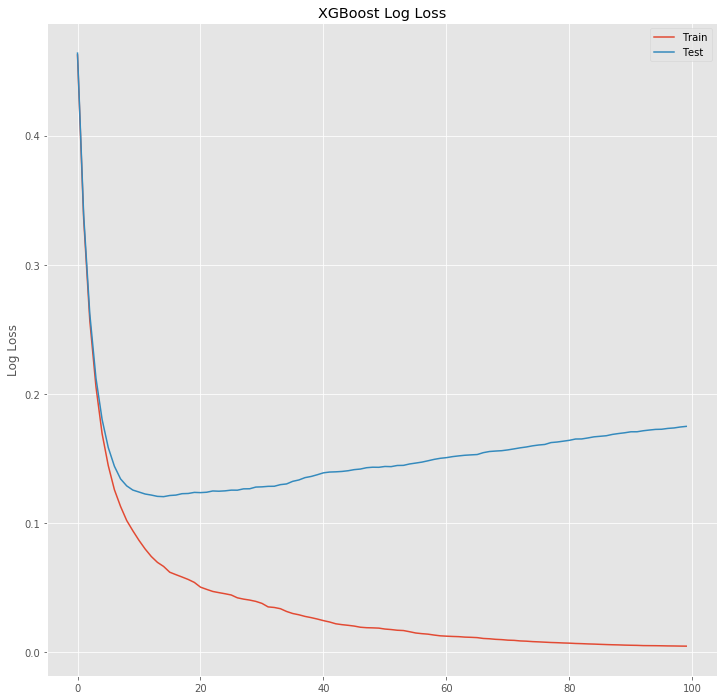

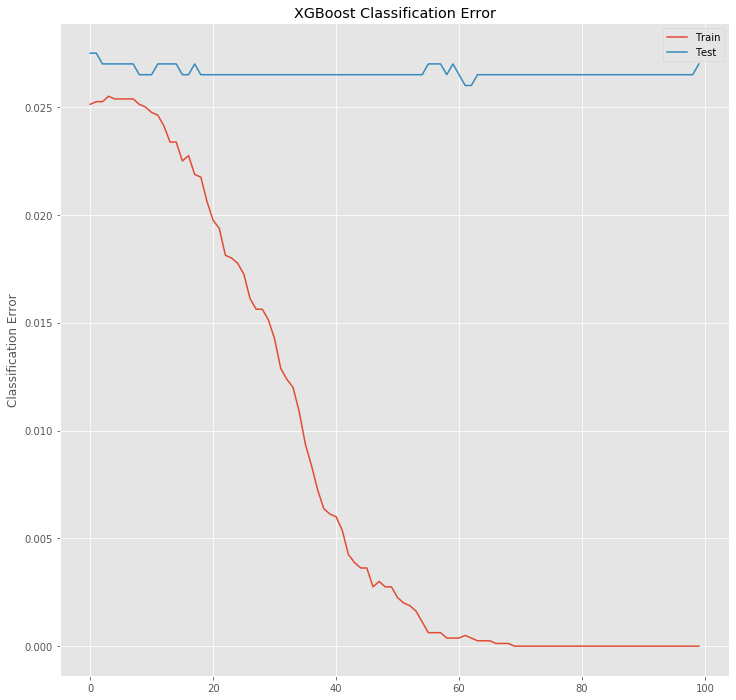

In [8]:
def XGBoost_Learning_Curves(dataf): 
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    from numpy import loadtxt
    from xgboost import XGBClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from matplotlib import pyplot
    import matplotlib.pyplot as plt    
    
    plt.style.use('ggplot')    
      
    # split data into X and y
    X = dataf.loc[:, dataf.columns != 'col1']
    Y = dataf.loc[:, dataf.columns == 'col1']
    
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    
    # fit model no training data
    model = XGBClassifier()
    eval_set = [(X_train, y_train), (X_test, y_test)]
    model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)
    
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    
    # plot log loss
    fig, ax = pyplot.subplots(figsize=(12,12))
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    
    pyplot.ylabel('Log Loss')
    pyplot.title('XGBoost Log Loss')
    pyplot.show()
    
    # plot classification error
    fig, ax = pyplot.subplots(figsize=(12,12))
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    
    pyplot.ylabel('Classification Error')
    pyplot.title('XGBoost Classification Error')
    pyplot.show()

XGBoost_Learning_Curves(df)

Data Source: https://labs.criteo.com/2013/12/download-terabyte-click-logs/

Project Inspiration:https://towardsdatascience.com/mobile-ads-click-through-rate-ctr-prediction-44fdac40c6ff

Mapping object to set of Integer wiht Hash Function, before using it in XGBoost: https://booking.ai/dont-be-tricked-by-the-hashing-trick-192a6aae3087

Regularization, Variance, OverFit Concept: https://www.youtube.com/watch?v=Q81RR3yKn30

XGBoost_Playlist by StatQuest: https://www.youtube.com/watch?v=OtD8wVaFm6E&list=PLblh5JKOoLULU0irPgs1SnKO6wqVjKUsQ

Visulazing XGBClassifier with val_metric Error & LogLoss: https://setscholars.net/wp-content/uploads/2019/02/visualise-XgBoost-model-with-learning-curves-in-Python.html